In [1]:
import numpy as np
import pandas as pd
import cv2
import os
from patchify import patchify
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
DIRECTORY = (r"C:\Users\tause\Advance_ANN\data")

In [19]:
CATEGORIES = []
for classes in os.listdir(DIRECTORY):
    CATEGORIES += [classes]

In [ ]:
filenames = os.listdir(DIRECTORY)
images = [Image.open(DIRECTORY + filename).convert('I;16') for filename in filenames]
stacked_image = Image.merge('I;16', images)

stacked_image.save('stacked_image.tif')

In [72]:
data = []
i=0
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    path = path + '\\' + CATEGORIES[i]
    i+=1
    for img in os.listdir(path):
        if(img==("Thumbs.db") or img==("balloons_RGB.bmp")):
            continue
        elif (img==("TESTCASE2_512x512.jpg")):
            img_path = os.path.join(path, img)
            label = CATEGORIES.index(category)   
            arr = cv2.imread(img_path)
            data.append(arr)
data = np.array(data,dtype=object).astype(int)    

In [73]:
data.shape

(1, 512, 512, 3)

In [74]:
data = data.reshape(512,512,3)
data.shape

(512, 512, 3)

In [75]:
height,width = data.shape[0],data.shape[1]
patches = []
R=0
C=0
for row in range(height//64):
    R = (R*64)//2
    for col in range(width//64):
        C = (col*64)//2
        patch = data[R:R+64,C:C+64]
        patches.append(patch)
#         print(R,"     ",C)
#         break
#     break
patches = np.array(patches)

In [76]:
patches.shape

(64, 64, 64, 3)

In [77]:
data.shape[:2]

(512, 512)

In [78]:
def extract_blocks(image, block_size, stride):
    blocks = []
    image_height, image_width = image.shape[:2]
    num_blocks_x = image_width // stride
    num_blocks_y = image_height // stride
    for y in range(0,image_height-block_size[1]+1,stride):
        for x in range(0,image_width-block_size[0]+1,stride):
            block=image[y:y+block_size[1],x:x+block_size[0]]
            blocks.append(block)
    return blocks

In [79]:
patches = extract_blocks(data,(64,64),32)
len(patches)

225

In [80]:
patches[0].shape

(64, 64, 3)

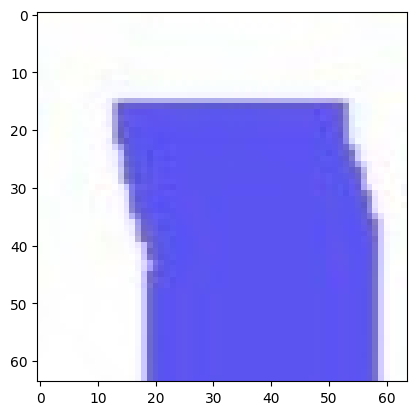

In [84]:
fig = plt.imshow(patches[0])
fig.axes.get_xaxis().set_visible(True)
fig.axes.get_yaxis().set_visible(True)

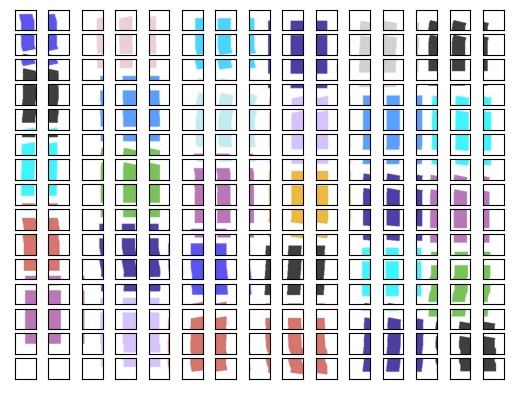

In [81]:
for i in range(225):
    plt.subplot(15,15,i+1)
    fig = plt.imshow(patches[i])
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

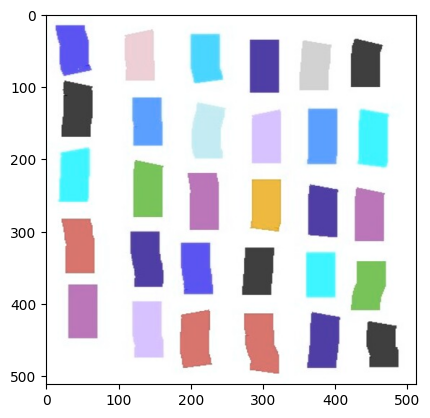

In [82]:
fig = plt.imshow(data)